In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
sns.set_palette("Blues_d")

from IPython.display import HTML

# import the widgets module
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

warnings.filterwarnings("ignore")
#sns.set(style="whitegrid")

indicators = ['Approved', 'Disapproved', 'No Answer']
time = pd.date_range('1999-08','2020-08', freq='MS').strftime("%Y-%b").tolist()
approved = [31,53,65,80,79,84,75,70,77,72,61,72,65,65,64,70,68,76,69,75,70,71,72,72,74,73,75,80,73,75,75,72,71,75,75,73,76,77,77,83,82,75,76,75,73,70,77,78,74,75,73,81,86,79,82,81,79,76,72,72,68,72,72,69,69,65,66,66,66,69,66,67,70,70,71,76,73,71,75,72,72,76,77,79,78,75,77,81,78,80,81,81,79,80,81,85,82,79,82,84,87,86,85,85,86,80,83,80,83,88,83,86,83,83,78,78,76,78,79,78,82,81,78,79,83,78,80,78,78,80,78,77,78,77,77,78,79,72,73,69,71,69,69,68,68,68,66,67,63,64,65,68,67,69,64,67,63,67,67,63,65,62,65,63,63,64,63,65,63,64,64,61,65,65,69,80,82,83,86,85,84,86,88,85,85,85,86,85,86,86,89,87,83,84,88,85,85,82,81,82,82,80,81,82,82,82,84,86,84,85,84,82,82,81,81,83,83,83,82,81,82,80,76,80,82,79,67,70,67,66,66,66,64,64,64,66,66,68,68,67,68,70,68,68,68,69,63,59,59,60,60,66,69]
disapproved = [33,27,20,12,13,10,17,21,15,17,26,17,26,27,26,22,23,18,21,19,25,22,22,22,19,21,19,18,19,19,20,24,22,20,20,20,20,20,19,15,16,22,22,21,24,27,22,19,23,22,24,18,13,20,17,16,19,21,25,25,30,26,26,29,28,32,32,26,31,29,32,31,27,28,26,23,25,27,23,26,26,23,21,19,21,22,22,18,21,19,18,18,19,18,18,14,16,20,16,15,12,13,13,13,12,15,13,17,15,10,14,12,15,14,20,20,21,18,19,19,16,18,20,19,15,21,19,20,20,19,20,21,20,21,20,19,19,25,25,29,27,29,30,31,30,31,31,32,36,34,34,31,32,30,34,32,35,31,32,36,35,37,34,36,37,35,35,35,36,35,35,37,34,34,30,18,17,16,13,14,15,14,11,14,14,15,13,14,13,13,10,12,17,15,12,14,14,18,19,17,17,19,18,17,18,18,16,14,15,14,15,17,18,18,18,15,15,17,17,18,17,18,22,19,17,20,32,30,33,33,33,33,34,35,34,33,32,31,31,31,31,29,31,31,31,30,36,33,34,35,33,33,30]

noans = []
for i in np.arange(253):
    add = approved[i] + disapproved[i]
    diff = 100 - add
    noans.append(diff)
    

table = {'Date': time,'Approved': approved, 'Disapproved': disapproved, 'No Answer': noans}
putin = pd.DataFrame(data=table).set_index('Date')

In [3]:
#Load the Levada Center data table on Putin's Approval rates from 1999 to 2020
putin

,Approved,Disapproved,No Answer
Date,,,
1999-Aug,31,33,36
1999-Sep,53,27,20
1999-Oct,65,20,15
1999-Nov,80,12,8
1999-Dec,79,13,8
...,...,...,...
2020-Apr,59,34,7
2020-May,60,35,5
2020-Jun,60,33,7


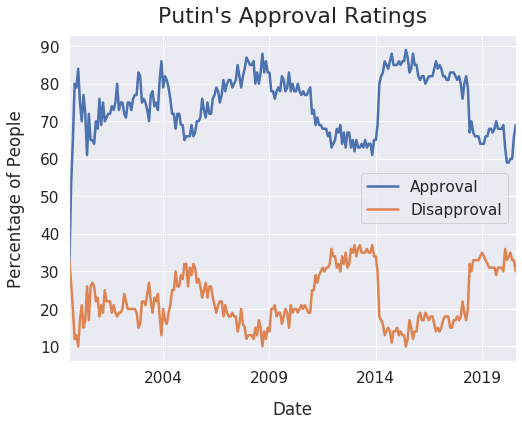

In [4]:
#Plot Putin's approval rates against his disapproval rates from 1999 to 2020

table_plot = {'Date': time,'Approval': approved, 'Disapproval': disapproved}
putin_plotted = pd.DataFrame(data=table_plot)
putin_plotted['Date'] = pd.to_datetime(putin_plotted['Date'])


sns.set(font_scale=1.4)
putin_plotted.set_index('Date').plot(figsize=(8, 6), linewidth=2.5,)
plt.xlabel("Date", labelpad=15)
plt.ylabel("Percentage of People", labelpad=15)
plt.title("Putin's Approval Ratings", y=1.02, fontsize=22);

The Levada Center conducts public opinion polls in Russia, which are generally considered
among the most credible surveys in a non-democratic country. Their most recent poll in August 2020, with a
sample of 1600, found that 69% of respondents approve of Vladimir Putin’s performance as
Prime Minister.

1. (1 point) Assuming the survey captured a simple random sample, calculate the standard error and then construct a 95% confidence interval for Putin’s approval rating.

In [63]:
#The formula for standard deviation is as follows: 

approval = ... #enter the approval rating here
sample_size = ... #enter the population sampled
standard_deviation = np.sqrt(approval * (1 - approval))
standard_deviation

0.4702127178203499

In [64]:
#The formula for standard error:
standard_error = standard_deviation / np.sqrt(sample_size)
standard_error

0.011755317945508747

In [65]:
#The 95% confidence interval:
confidence_interval = [(approval - (1.96 * standard_error)), (approval + (1.96 * standard_error))] #separate these
confidence_interval

[0.6469595768268029, 0.6930404231731971]

2. (1 point) Suppose that 20% of the sample lives in the Moscow area, while the remaining 80% does not. Among the Muscovites (those living in Moscow), the approval rate for Putin is 60%, and among the rest is 69%. Create a 95% confidence interval for the difference of Putin approval between Muscovites and others. 

In [7]:
#Find the approval rating and population of the Muscovite sample
moscow_approval = ...
moscow_sample_size = ...

In [8]:
#Find the standard deviation of the Muscovite sample
moscow_standard_deviation = np.sqrt(moscow_approval * (1 - moscow_approval))
moscow_standard_deviation

0.4898979485566356

In [13]:
#Find the approval rating and population of the non-Muscovite sample
rest_approval = ...
rest_sample_size = ...

In [14]:
#Find the standard deviation of the non-Muscovite sample
rest_standard_deviation = np.sqrt(rest_approval * (1 - rest_approval))
rest_standard_deviation

0.4624932431938871

Using **np.sqrt**, your two populations and standard deviations, find the standard error of the difference of means between the Muscovite and non-Muscovite samples

In [26]:
#Find the standard error of the difference of means between the Muscovite and non Muscovite sample
standard_error_diff = np.sqrt(...)
standard_error_diff

In [24]:
#Find the confidence interval for the difference of Putin approval between Muscovites and others:
approval_diff = rest_approval-moscow_approval #dont give this

confidence_interval_diff = [(approval_diff - (1.96 * standard_error_diff)), (approval_diff + (1.96 * standard_error_diff))]
confidence_interval_diff

[0.05309109355453616, 0.12690890644546376]

3. (1 point) Is 0 in your confidence interval? What does this mean?

*ANSWER HERE*

4. (2 points) If we want to know what people really think about Putin, why might this measure not be valid?

*ANSWER HERE*